In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_style('ticks', {'axes.grid': True})
sns.set_context('poster', font_scale=2.0)
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
import pickle
import os
import scipy.optimize
import scipy.constants as sc

In [4]:
import scipy

import scipy.constants as sc
hbarc = ( sc.hbar * sc.speed_of_light
         / sc.mega / sc.electron_volt / sc.femto )
ainv = 2.194e3 # lattice cutoff in GeV
lat_unit = hbarc/ainv # lattice spacing in fm

In [5]:
print(scipy.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.0.0
0.8.1
2.2.2


In [6]:
ls ../data

Rcorr/           meff_xi_L64.pkl  potential/


In [7]:
with open('../data/meff_xi_L64.pkl', 'rb') as fin:
    meff, meff_err, meffs = pickle.load(fin)

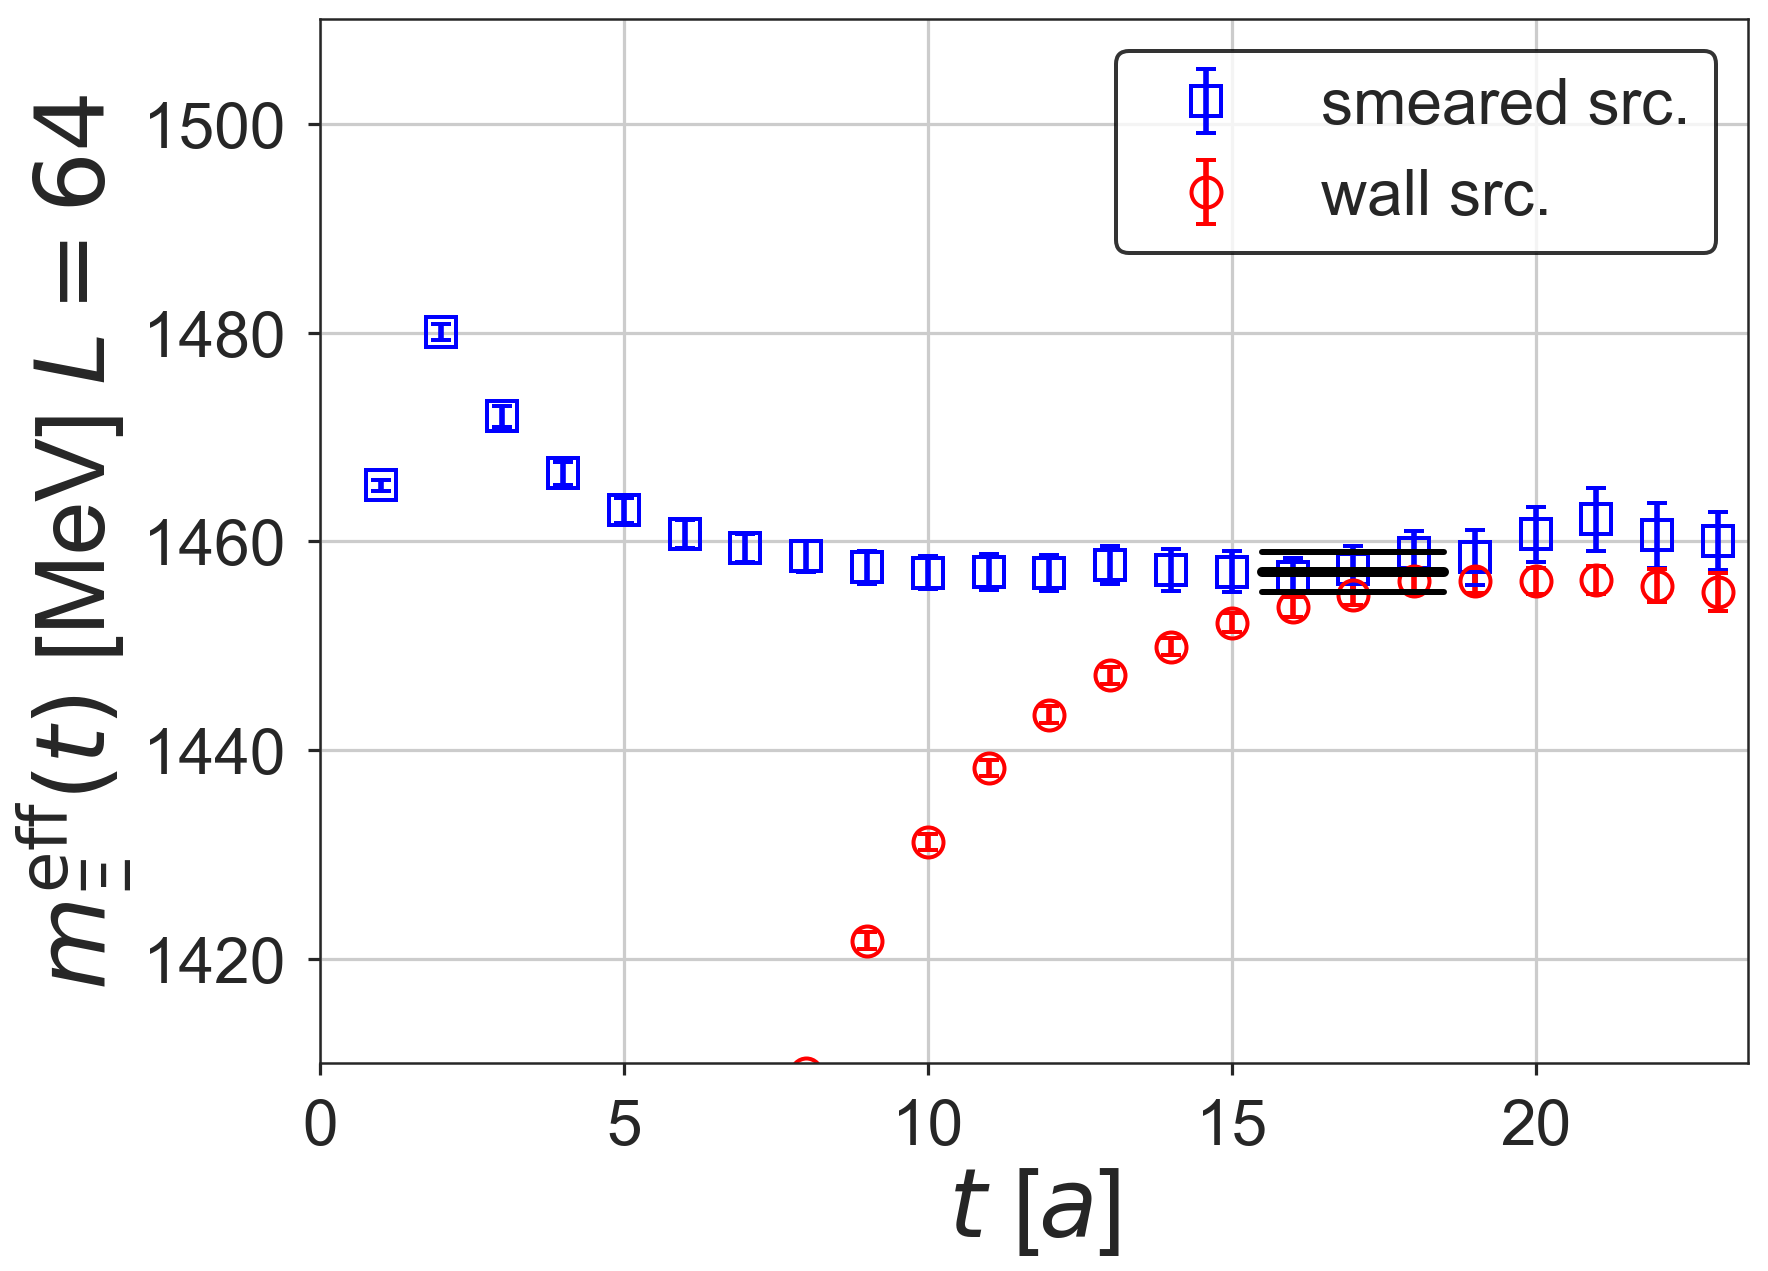

In [8]:
fig, ax = plt.subplots()

ax.errorbar(meffs['exp'][:,0], meffs['exp'][:,1]*ainv, meffs['exp'][:,2]*ainv, fmt='s',
           color='blue', label='smeared src.', capsize=5, capthick=2, ms=15, mfc='none', mew=2.0)

ax.errorbar(meffs['wall'][:,0], meffs['wall'][:,1]*ainv, meffs['wall'][:,2]*ainv, fmt='o',
           color='red', label='wall src.', capsize=5, capthick=2, ms=15, mfc='none', mew=2.0)

tmin, tmax = 16, 18
fits = np.linspace(tmin-0.5, tmax+0.5)
ax.plot(fits, np.zeros(len(fits)) + meff*ainv, color='black', lw=5.0, zorder=5)
ax.plot(fits, np.zeros(len(fits)) + (meff+meff_err)*ainv, color='black', lw=3.0, zorder=5)
ax.plot(fits, np.zeros(len(fits)) + (meff-meff_err)*ainv, color='black', lw=3.0, zorder=5)

ax.set_xlim(0,23.5)
ax.set_ylim(1410, 1510)
leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)
ax.set_xlabel('$t$ [$a$]', size=48)
ax.set_ylabel('$m_\Xi^\mathrm{eff}(t)$ [MeV] $L = 64$', size=48)
fig.savefig('../figs/xi_effective_mass.pdf', bbox_inches='tight')